In [1]:
import pandas as pd

Ideas:
- Does defense really win championships?
    - Coaches always tell us growing up "offense wins games, defense wins championships", is this really true?
        - examine summary stats of teams that win most games in the season and teams that win championships, create data viz of key stats
        - 

Intro:

"Offense wins games... Defense wins championships!" -- an axiom that every athlete has heard from their coaches at every level of the game. As young athletes we don't question whether the phrase carries any truth or whether it's just meant to get us to stop thinking about our own points tally and start playing some defense, but as a data science student I am now in a position to do just that. In keeping with the season, as MarchMadness is upon us, I will explore the truthfulness of this quote in the context of NCAA basketball. In this article, I outline the process I used to clean and visualize the data from 10 NCAA Division I men's basketball seasons and how I used [insert type of regression model I used] to discern which team statistics have the largest association with winning regular season games and championships.

The code from my analysis can be found within my github repository, [here](Insert repo link).

The Data:

My analysis will feature this Kaggle [dataset](https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset) containing team statistics of each division I team for the 2013-2019 and 2021-2023 seasons (ignoring the 2020 COVID season). The main columns used in the analysis will be:
    - TEAM
    - YEAR
    - W (wins)
    - G (games)
    - ADJOE (Adjusted Offensive Efficiency - An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
    - ADJDE (Adjusted Defensive Efficiency - An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)
    - POSTSEASON - Round where the given team was eliminated or where their season ended

In [2]:
# Load the data
cbb = pd.read_csv('data/cbb.csv')
cbb = cbb.sort_values(by='YEAR')
cbb.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
1761,Southern Illinois,MVC,30,13,100.2,100.8,0.4840,48.0,53.1,19.4,...,42.5,48.1,51.8,31.8,36.9,63.1,-8.3,NaN,NaN,2013
1933,Hofstra,CAA,31,6,88.1,100.0,0.1890,42.0,48.9,22.2,...,36.7,41.6,50.0,28.7,31.0,64.9,-19.7,NaN,NaN,2013
1934,Longwood,BSth,31,6,93.5,114.2,0.0910,48.3,54.4,22.7,...,34.7,48.3,53.1,32.1,38.3,70.7,-19.5,NaN,NaN,2013
1935,SIU Edwardsville,OVC,25,7,90.4,106.4,0.1338,47.7,51.6,21.7,...,36.9,44.6,52.6,36.4,33.0,66.2,-13.8,NaN,NaN,2013
1936,Tennessee Martin,OVC,28,7,91.9,112.9,0.0861,43.3,53.5,21.1,...,44.9,40.9,53.3,32.7,35.9,68.4,-16.0,NaN,NaN,2013
1937,Seattle,WAC,29,7,92.5,97.1,0.3642,47.1,46.7,25.5,...,42.7,46.5,45.9,32.2,32.1,70.1,-16.2,NaN,NaN,2013
1938,UNC Greensboro,SC,29,7,96.1,106.4,0.2357,47.0,50.2,17.8,...,51.9,45.0,48.2,33.8,36.2,71.8,-18.0,NaN,NaN,2013
1939,Chicago St.,GWC,29,7,90.6,102.1,0.2017,44.4,50.5,21.2,...,48.1,41.9,48.6,32.6,36.0,67.1,-15.7,NaN,NaN,2013
1940,UMBC,AE,30,7,94.8,107.4,0.1909,46.6,51.2,21.3,...,44.0,44.2,53.8,33.9,30.9,67.7,-17.6,NaN,NaN,2013
1941,Navy,Pat,30,7,87.7,102.8,0.1392,44.1,49.6,18.5,...,38.4,42.2,50.7,32.1,31.9,61.0,-18.2,NaN,NaN,2013


EDA:

First I filtered the dataset to drop the teams that did not participate in the NCAA tournament as those teams would not have a high win count nor would they have had a chance to win the championship. Next, in order to avoid confusion, I created the column TEAM_YEAR by appending the contents of TEAM and YEAR. This also made sense in the context of college sports teams as the rosters are evolving frequently, so teams are often referred to by the season they played. I also had to create a dummy variable CHAMP (a binary column indicating 1 for yes and 0 for no) indicating whether each team won the championship or not.
Then, as we want to identify the keys to winning regular season games and the keys to winning championships, I decided to see how many of the winningest teams also won the championship that year to get a sense of how likely those keys are to coincide.

We can see from the above bar plot that 50% of the winningest teams won the championship that season. 

Next, to get a preliminary understanding of how good successful teams are on offense and defense, I created a scatter plot of offensive and defensive efficiency. I once again coloured the championship teams in the dataset in gold.

In [3]:
# Drop teams that did not participate in the NCAA tournament as the teams that won the most games are always invited to the tournament.
df = cbb.dropna(subset=['SEED'])
df.head(20)

# Check to make sure we have 68 teams per season (64 tournament teams + 4 losers of the 'first 8' prelim games)
for year in df['YEAR'].unique().tolist():
    num_teams = df[df['YEAR'] == year].shape[0]
    if num_teams == 68:
        print(f"{year}: Correct number of teams ({num_teams}).")
    else:
        print(f"{year}: Incorrect number of teams ({num_teams}).")

2013: Correct number of teams (68).
2014: Correct number of teams (68).
2015: Correct number of teams (68).
2016: Correct number of teams (68).
2017: Correct number of teams (68).
2018: Correct number of teams (68).
2019: Correct number of teams (68).
2021: Correct number of teams (68).
2022: Correct number of teams (68).
2023: Correct number of teams (68).


In [4]:
# Sort by wins in descending order to see the top 10 winningest seasons

df = df.sort_values(by='W', ascending=False)
df.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
49,Kentucky,SEC,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,...,31.7,51.2,39.1,34.9,27.1,63.5,13.1,F4,1.0,2015
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018
52,Florida,SEC,39,36,115.9,88.4,0.9575,52.2,45.4,17.5,...,31.2,51.3,43.5,35.9,33.0,63.1,11.7,F4,1.0,2014
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
13,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,34.9,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
3192,Florida Atlantic,CUSA,37,35,114.0,95.8,0.8815,54.3,46.1,16.9,...,26.3,53.8,44.7,36.6,32.4,67.5,4.7,F4,9.0,2023


In [5]:
# Create column TEAM_YEAR so that teams aren't aggregated over seasons
df['TEAM_YEAR'] = df['TEAM'] + " " + df['YEAR'].astype(str)

# Reorder columns so TEAM_YEAR is at the start
cols = ['TEAM_YEAR'] + [col for col in df if col not in ['TEAM_YEAR', 'TEAM']] + ['TEAM']
df = df[cols]

# Create binary column CHAMP to show if team won championship or not
df['CHAMP'] = df['POSTSEASON'].apply(lambda x: 1 if x == 'Champions' else 0)

df.head(10)

,TEAM_YEAR,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,TEAM,CHAMP
49,Kentucky 2015,SEC,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,...,39.1,34.9,27.1,63.5,13.1,F4,1.0,2015,Kentucky,0
4,Gonzaga 2017,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,Gonzaga,0
11,Villanova 2018,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018,Villanova,1
52,Florida 2014,SEC,39,36,115.9,88.4,0.9575,52.2,45.4,17.5,...,43.5,35.9,33.0,63.1,11.7,F4,1.0,2014,Florida,0
1,Wisconsin 2015,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,Wisconsin,0
8,Virginia 2019,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019,Virginia,1
10,Villanova 2016,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016,Villanova,1
13,Louisville 2013,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013,Louisville,1
7,Duke 2015,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015,Duke,1
3192,Florida Atlantic 2023,CUSA,37,35,114.0,95.8,0.8815,54.3,46.1,16.9,...,44.7,36.6,32.4,67.5,4.7,F4,9.0,2023,Florida Atlantic,0


In [6]:
# Create visualization to display the number of wins of each of the top 10 winningest teams and colour by whether they won the championship

import altair as alt

df_top10_wins = df.sort_values(by='W', ascending=False).head(10)

wins_chart = alt.Chart(df_top10_wins).mark_bar().encode(
    x=alt.X('TEAM_YEAR:N', sort='-y', title='Team and Year', axis=alt.Axis(labelAngle=45)),
    y=alt.Y('W:Q', title='Number of Wins'),
    color=alt.Color('CHAMP:N', scale=alt.Scale(domain=[0, 1], range=['lightgray', 'gold']), legend=alt.Legend(title="Champion")),
    tooltip=['TEAM_YEAR', 'W', 'CHAMP']
).properties(
    title='Top 10 Winningest Teams, Colored by Championship Status',
    width=800,  # Adjusted for better visualization
    height=400
)

wins_chart.display()

alt.Chart(...)

In [7]:
# Find the correlation between wins and championships

correlation = df[['W', 'CHAMP']].corr()
print(correlation)

              W     CHAMP
W      1.000000  0.237631
CHAMP  0.237631  1.000000


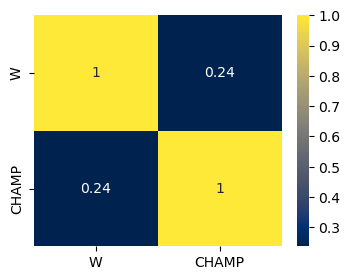

In [20]:
# Correlation Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))  # Adjust the size as needed

sns.heatmap(correlation, annot=True, cmap = 'cividis')

plt.show()

In [37]:
# Create side by side bar plot of ADJOE and ADJDE of the top 10 winningest teams

melted_data_sorted = df_top10_wins.melt(id_vars=['TEAM_YEAR'], value_vars=['ADJOE', 'ADJDE'], var_name='Efficiency Type', value_name='Efficiency')
# Create the bar plot
base = alt.Chart(melted_data_sorted).encode(
    y=alt.Y('TEAM_YEAR:N', axis=alt.Axis(title=None, labels=True)),
    x=alt.X('Efficiency:Q', axis=alt.Axis(title='Efficiency')),
    color=alt.Color('Efficiency Type:N', legend=alt.Legend(title="Efficiency Type")),
    tooltip=['TEAM_YEAR', 'Efficiency Type', 'Efficiency']
)

# Create a bar chart
bars = base.mark_bar().encode(
    alt.X('Efficiency:Q', axis=alt.Axis(title='Efficiency')),
    alt.Column('Efficiency Type:N')
)

# Combine the charts
chart = bars.properties(
    title='Adjusted Defensive and Offensive Efficiency of the Top 10 Winning Teams',
    width=400,
    height=300
)

chart.display()


alt.Chart(...)

In [55]:
# Create a scatter plot of ADJOE and ADJDE and colour based on whether the team was in the top 10 in wins

scatter_plot = alt.Chart(df).mark_circle(opacity=0.9).encode(
    x=alt.X('ADJOE:Q', title='Adjusted Offensive Efficiency', scale=alt.Scale(domain=[df['ADJOE'].min() - 2.5, df['ADJOE'].max() + 2.5])),
    y=alt.Y('ADJDE:Q', title='Adjusted Defensive Efficiency', scale=alt.Scale(domain=[df['ADJDE'].min() - 2.5, df['ADJDE'].max() + 2.5])),
    color=alt.Color('CHAMP:N', legend=alt.Legend(title="Championship status")),
    tooltip=['TEAM_YEAR', 'ADJOE', 'ADJDE', 'W']
).properties(
    title="Scatter Plot of Teams by ADJOE, ADJDE, Colored by Championship Status",
    width=800,
    height=400
)

mean_ADJOE = df['ADJOE'].mean()
mean_ADJDE = df['ADJDE'].mean()

mean_ADJDE_line = alt.Chart(df).mark_rule(color='red', opacity=0.9).encode(
    y='mean(ADJDE):Q'
)

# Vertical line for the mean ADJOE
mean_ADJOE_line = alt.Chart(df).mark_rule(color='green', opacity=0.9).encode(
    x='mean(ADJOE):Q'
)

# Combine the scatter plot with the mean lines
final_plot = scatter_plot + mean_ADJDE_line + mean_ADJOE_line

final_plot.display()


alt.LayerChart(...)

We can draw some very interesting conclusions from this plot. First of all, we see that none of the championship teams are above average in defensive efficiency and are all above average in offensive efficiency. This is damning evidence against the coach's axiom. We can also see that teams tend not to be excellent both defensively and offensively as the data trends in a downward diagonal from left to right signaling a tradeoff between defensive and offensive efficiency. Interestingly, the data point which is lowest in defensive rating represents 2015 Kentucky - the team with the highest win count across the entire dataset. This team also failed to win the championship despite having the best regular season of any team in the dataset, suggesting that better defense may have helped bring home the championship. 

The model:

To settle the contradicting conclusions we drew from the EDA plots, we will use logistic regression to model the relationship between offensive efficiency, defensive efficiency, and the response variable, whether or not the team won the championship. Then, by examining the regression coefficients we will be able to determine which is associated more strongly to winning a championship. 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Prepare the features (X) and the target (y)
X = df[['ADJOE', 'ADJDE']]
y = df['CHAMP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Perform cross-validation
# cv specifies the number of folds; 5 is a common choice
scores = cross_val_score(logistic_model, X_train, y_train, cv=5)

# Create a DataFrame from the scores
cv_results_df = pd.DataFrame(scores, columns=['Accuracy'])

# Add additional statistics as new rows
cv_results_df.loc['mean', :] = cv_results_df.mean()
cv_results_df.loc['std', :] = cv_results_df.std()

cv_results_df


,Accuracy
0,0.990826
1,0.981651
2,0.990826
3,0.963303
4,0.990741
mean,0.983469
std,0.010687


In [77]:
# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict the Championship status on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy:", accuracy)

Test accuracy: 0.9705882352941176


In [71]:
# Examine the regression coefficients
coefficients = logistic_model.coef_[0]

# Create a DataFrame for the coefficients
coefficients_df = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])

# Display the DataFrame
coefficients_df

,Coefficient
ADJOE,0.281457
ADJDE,-0.400911


In [82]:
# To interpret the coefficients in terms of the odds of being a champion instead of the log odds, we must exponentiate the coefs

print(f"A 1 unit increase in Adjusted Offensive Efficiency results in a {np.exp(coefficients[0])} times increase in the odds of being a champion")
print(f"A 1 unit increase in Adjusted Defensive Efficiency results in a {np.exp(coefficients[1])} times decrease in the odds of being a champion")

A 1 unit increase in Adjusted Offensive Efficiency results in a 1.3250595899679076 times increase in the odds of being a champion
A 1 unit increase in Adjusted Defensive Efficiency results in a 0.669709784065047 times decrease in the odds of being a champion
